# (2)


In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
d1=pd.read_csv("Iris_train.csv").iloc[:,1:]
d3=pd.read_csv("Iris_test.csv").iloc[:,1:]
Actual_Class=d3['Species']
d4=d3.drop(['Species'],axis=1)
d4=np.array(d4)
a=np.array(d1)
d4












array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2]])

# Calculating Prior and likelihood

In [2]:
def group(df,str_1,str_2):
    x= df.groupby(str_1).get_group(str_2)
    return x
setosa= group(d1,'Species','Iris-setosa')
versicolor=group(d1,'Species','Iris-versicolor')
virginica= group(d1,'Species','Iris-virginica')
Irissetosa=setosa.drop(['Species'],axis=1)
Irisversicolor=versicolor.drop(['Species'],axis=1)      
Irisvirginica=virginica.drop(['Species'],axis=1)
Class=[(Irissetosa),(Irisversicolor),(Irisvirginica)]
mean=[]
for i in range(len(Class)):
    mean.append(Class[i].mean())
def standard(df):
    a=np.array(df)
    b=a.T
    for j in range(len(b)):
        b[j]=b[j]-np.mean(b[j])
    return b         
Classes=[standard(Irissetosa),standard(Irisversicolor),standard(Irisvirginica)]
PriorS=len(setosa.axes[0])/len(d1.axes[0])
Priorve=len(versicolor.axes[0])/len(d1.axes[0])
Priorvi=len(virginica.axes[0])/len(d1.axes[0])
Prior=[PriorS,Priorve,Priorvi]
mean=np.array(mean)
mean



array([[4.99      , 3.44      , 1.4525    , 0.2425    ],
       [5.9195122 , 2.77073171, 4.24146341, 1.32195122],
       [6.53333333, 2.96666667, 5.52051282, 2.        ]])

# Classification

In [3]:

Predicted=[]
for i in range(len(d4)):
    Prob=[]
    for j in range(3):
        p=Prior[j]
        covariance=np.dot(Classes[j],Classes[j].T)/len(Classes[j][0])      
        likelihood=(1/(pow((2*math.pi),len(d4[0])/2)*pow(np.linalg.det(covariance),0.5)*(pow(math.e,(np.dot((np.dot(d4[i]-mean[j],(np.linalg.inv(covariance)))),(d4[i]-mean[j]).T))))))     
        posterior=p*likelihood
        Prob.append(posterior)   
    if max(Prob)==Prob[0]:
        Predicted.append("Iris-setosa")
    elif max(Prob)==Prob[1]:
        Predicted.append("Iris-versicolor")
    elif max(Prob)==Prob[2]:
        Predicted.append("Iris-virginica") 
Predicted 


    

C:\Users\Nani Panyu\AppData\Local\Temp\ipykernel_1800\153712285.py:7: RuntimeWarning: overflow encountered in double_scalars
  likelihood=(1/(pow((2*math.pi),len(d4[0])/2)*pow(np.linalg.det(covariance),0.5)*(pow(math.e,(np.dot((np.dot(d4[i]-mean[j],(np.linalg.inv(covariance)))),(d4[i]-mean[j]).T))))))


['Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa']

# Confusion matrix

In [4]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
predicted=np.array(Predicted)
CM=confusion_matrix(Actual_Class,predicted, labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
CM


array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

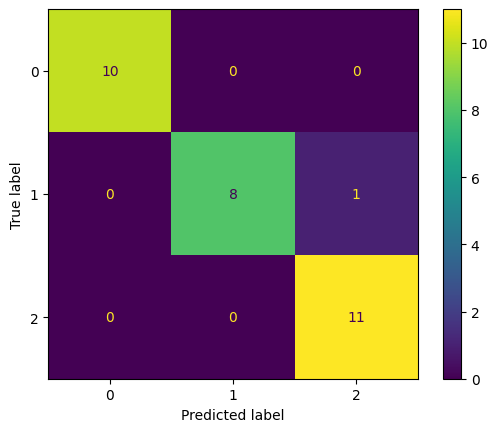

In [5]:
ConfusionMatrixDisplay(CM).plot()

# Accuracy

In [6]:
count=0
for i in range(len(Actual_Class)):
    if Predicted[i]==Actual_Class[i]:
        count+=1
print("Accuracy is:",(count/len(Actual_Class))*100)    

Accuracy is: 96.66666666666667
